In [1]:
import pandas as pd

df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


# **Linear Regression**

In [5]:
from sklearn.preprocessing import OneHotEncoder

df_enc = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)
df_enc.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


In [6]:
df_enc = pd.get_dummies(df, dtype=int)

In [7]:
df_enc

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,55,55,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,71,65,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,78,77,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [16]:
X = df_enc[['test preparation course_completed']]
y = df_enc['math score']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: " , root_mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  246.5349684218782
RMSE:  15.701432050035379
R2:  0.009146128006992993


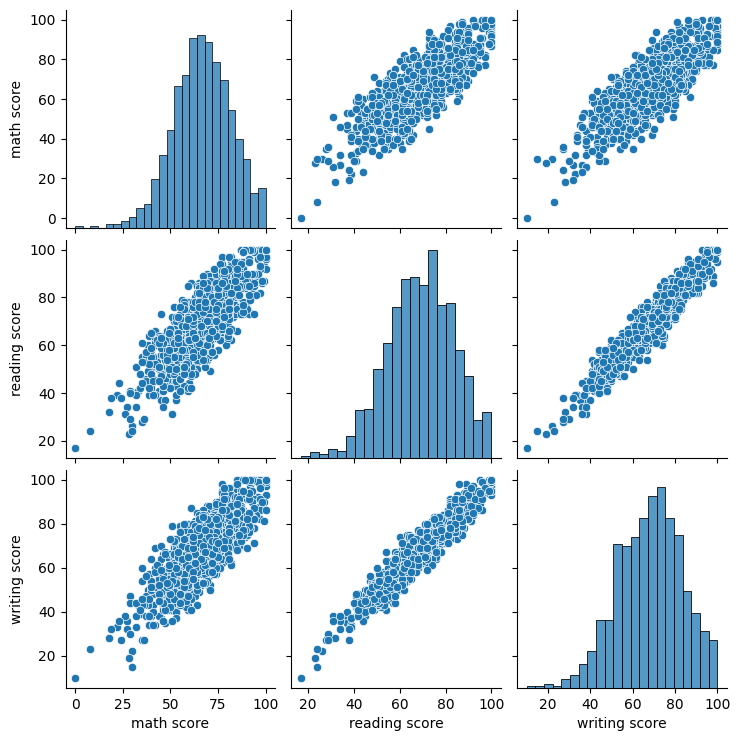

In [26]:
import seaborn as sns

sns.pairplot(df[["math score", "reading score", "writing score"]])


<Axes: >

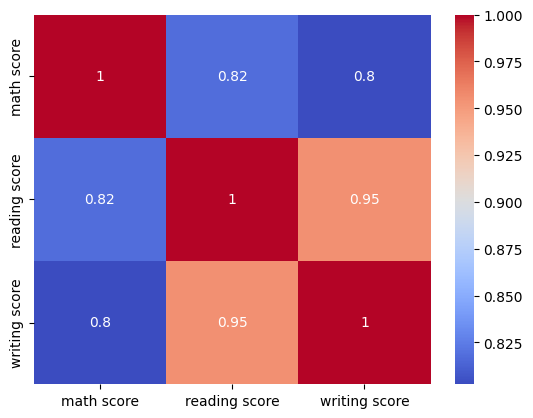

In [42]:
sns.heatmap(df[["math score", "reading score", "writing score"]].corr(), annot=True, cmap="coolwarm")

In [28]:
X = df_enc[['reading score']]
y = df_enc['math score']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [32]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: " , root_mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  82.63020543977036
RMSE:  9.090115810030715
R2:  0.6678992050187866


In [36]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: " , root_mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  77.75953982761706
RMSE:  8.818136981676858
R2:  0.6804469009921283


In [37]:
X = df_enc[['writing score']]
y = df_enc['math score']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: " , root_mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  87.4548424387226
RMSE:  9.351729382243832
R2:  0.6406040212365882


In [44]:
X = df_enc[['writing score']]
y = df_enc['reading score']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: " , root_mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  22.351109420349754
RMSE:  4.727695994916525
R2:  0.901225573262185


In [61]:
model.coef_

array([0.91632657])

In [62]:
model.intercept_

np.float64(6.826719033446558)

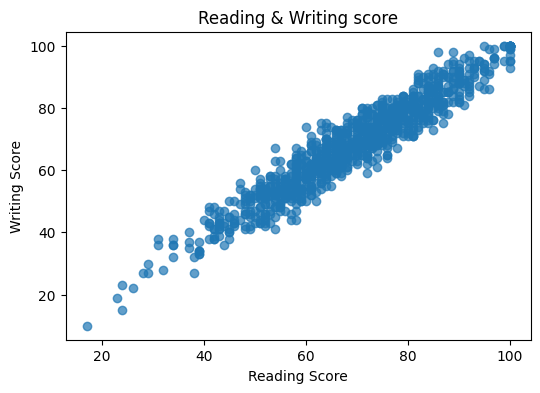

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(df['reading score'], df['writing score'], alpha=0.7)
plt.title('Reading & Writing score')
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
# plt.grid(True)
plt.show()

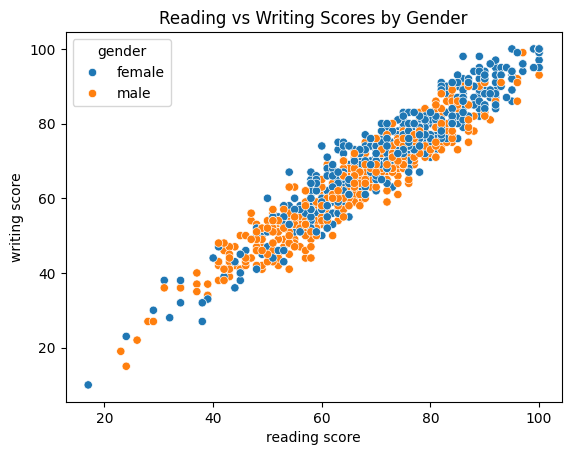

In [56]:
sns.scatterplot(data=df, x="reading score", y="writing score", hue="gender")
plt.title("Reading vs Writing Scores by Gender")
plt.show()

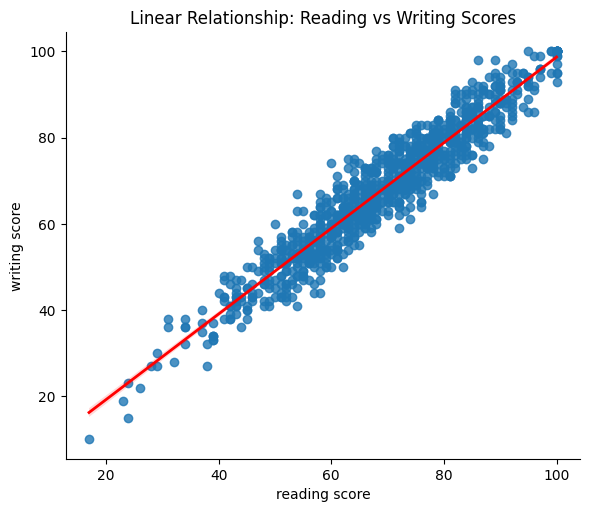

In [60]:
sns.lmplot(data=df, x="reading score", y="writing score", height=5, aspect=1.2, line_kws={"color":"red", "lw":2})
plt.title("Linear Relationship: Reading vs Writing Scores")
plt.show()

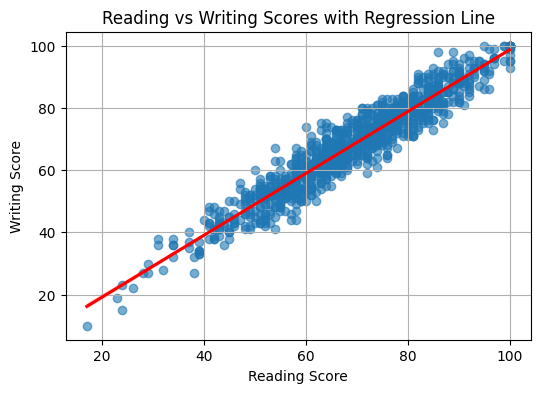

In [71]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.regplot(x="reading score", y="writing score", data=df, scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.title("Reading vs Writing Scores with Regression Line")
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.grid(True)
plt.show()


In [72]:
X = df[['reading score', 'writing score']]
y = df['math score']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(X_test)

In [76]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: " , root_mean_squared_error(y_test, y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  77.24297821278955
RMSE:  8.788798451027851
R2:  0.6825697127424626


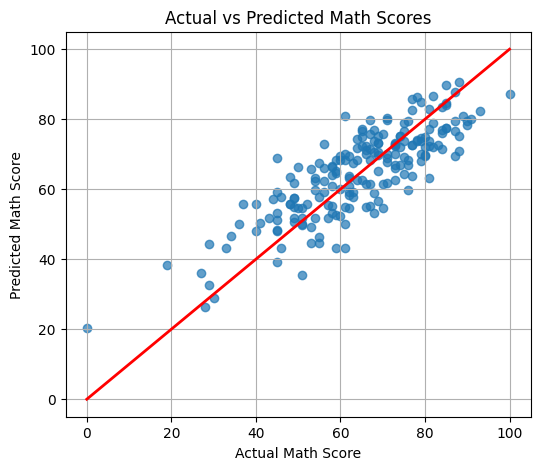

In [77]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores")
plt.grid(True)
plt.show()





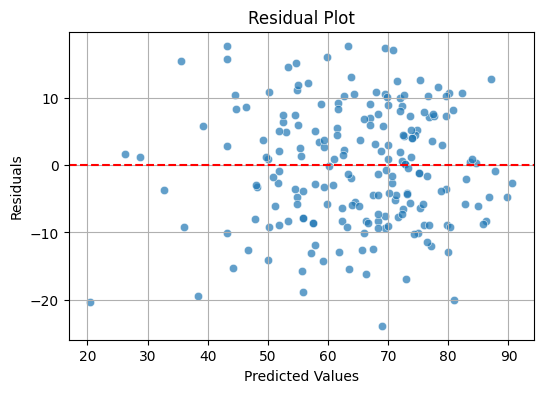

In [78]:
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


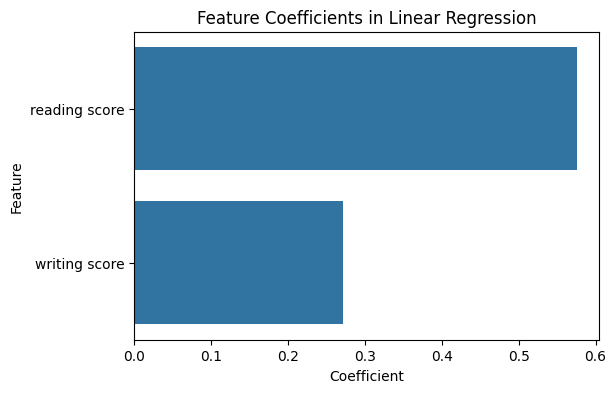

In [79]:
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
})

plt.figure(figsize=(6, 4))
sns.barplot(x="Coefficient", y="Feature", data=coef_df)
plt.title("Feature Coefficients in Linear Regression")
plt.show()


In [80]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
ols_model = sm.OLS(y, X_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Sat, 01 Nov 2025   Prob (F-statistic):          2.25e-243
Time:                        11:03:39   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.5241      1.328      5.665